Elabore um programa em Python para realizar sucessivas aplicações dos algoritmos de afinamento e
poda até ocorrer a convergência, isto é, até que sua aplicação não provoque mais alterações na
imagem. Procure uma imagem de impressão digital para testar sua implementação. Leia as seções
correspondentes nos livros texto, tanto Gonzalez e Woods quanto Pedrini e Schwartman para obter
informações sobre estes operadores morfológicos. Você também pode obter informação no conteúdo
da Aula18, que ilustra um dos passos do afinamento. O afinamento emprega um conjunto de
elementos estruturantes onde apenas um deles foi discutido na Aula18. Você pode obter informações
sobre os elementos estruturantes usados na poda nos livros texto.

In [50]:
#aplicando o operador morfológico de algoritmo de afinamento e poda
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.morphology import binary_erosion, binary_dilation

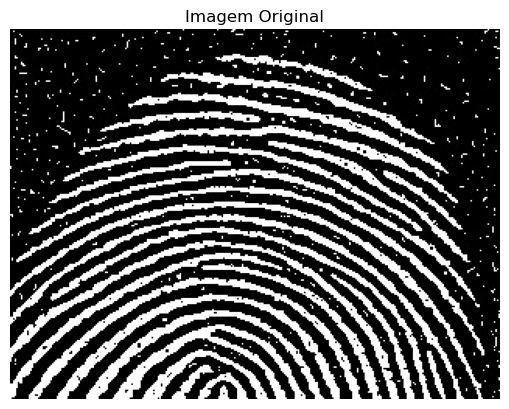

In [51]:
img = 'ID.png'
imagem_original = io.imread(img)

plt.title('Imagem Original')
plt.imshow(imagem_original, cmap = 'gray') #carregar a imagem usando a biblioteca para poder chamar o metodo copy na str img
plt.axis('off')  # Desativa os eixos
plt.show()

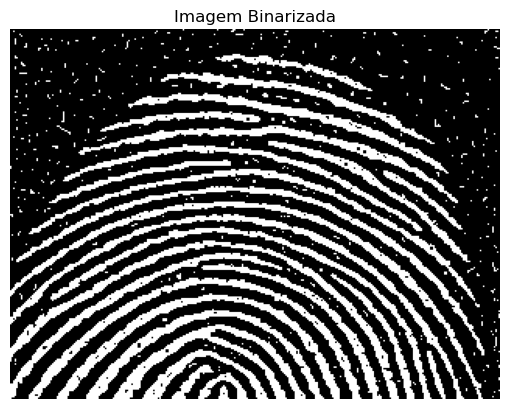

In [52]:
ib = imagem_original.copy()
ib[ib < 100] = 0
ib[ib > 0] = 255

#é possível inverter os valores para transformar os pixels brancos em pretos e vice-versa,
#pode utilizimagem_binarizada = 255 - imagem_binarizada

plt.title('Imagem Binarizada')
plt.imshow(ib, cmap='gray')
plt.axis('off')  # Desativa os eixos
plt.show()

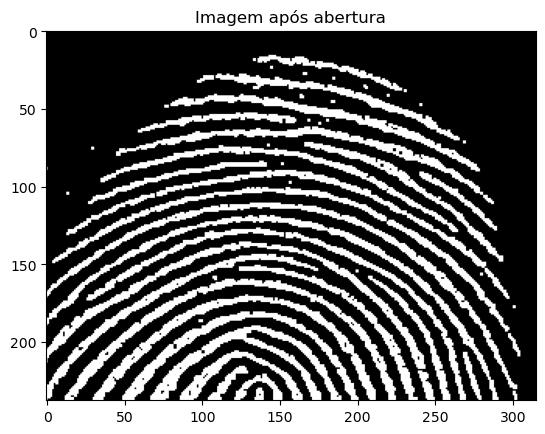

In [53]:
# definindo um elemento estruturante 2x2
elem_estruturante_2x2 = np.ones((2,2)).astype('uint8')

aberta = binary_dilation(binary_erosion(ib, elem_estruturante_2x2), elem_estruturante_2x2)

plt.title('Imagem após abertura')
plt.imshow(aberta, cmap='gray')

In [54]:
elem_foreground = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [1, 1, 1]])

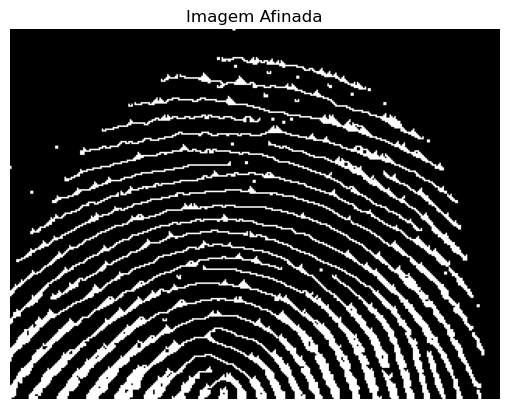

In [55]:
def hit_or_miss(imagem, elem_foreground, elem_background):
    # Aplica erosão na imagem utilizando o elemento estruturante correspondente ao foreground
    erosao_foreground = binary_erosion(imagem, elem_foreground)

    # Aplica erosão na imagem invertida utilizando o elemento estruturante correspondente ao background
    imagem_invertida = 1 - imagem
    erosao_background = binary_erosion(imagem_invertida, elem_background)

    resultado = erosao_foreground * erosao_background
    return resultado

# Define os elementos estruturantes para foreground e background
ef = np.zeros((3,3))
ef[1,1] = 1
ef[2,:] = 1

elem_background = np.zeros((3,3))
elem_background[0,:] = 1

# Função de afinamento
def verifica_convergencia(img_atual, img_anterior):
    return np.array_equal(img_atual, img_anterior)

def afinamento(imagem, elem_fg, elem_bg):
    img = imagem.copy()
    while True:
        img_antiga = img.copy()
        operacao = hit_or_miss(img, elem_fg, elem_bg)
        img ^= operacao

        if verifica_convergencia(img, img_antiga):
            break
    return img

digital_afinada = afinamento(aberta, elem_foreground, elem_background)
plt.title('Imagem Afinada')
plt.imshow(digital_afinada, cmap='gray')
plt.axis('off')
plt.show()


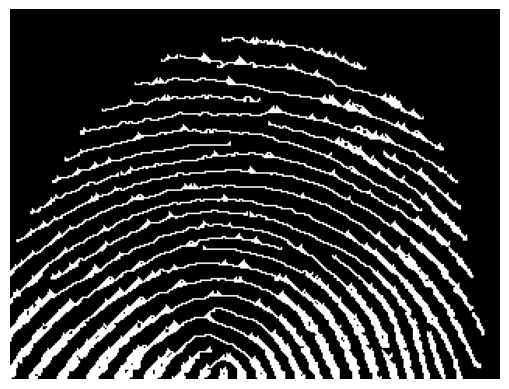

In [56]:
from skimage.measure import label, regionprops

def hit_or_miss(imagem, elem_foreground, elem_background):
    erosao_foreground = binary_erosion(imagem, elem_foreground)
    imagem_invertida = 1 - imagem
    erosao_background = binary_erosion(imagem_invertida, elem_background)
    return erosao_foreground * erosao_background

def afinamento(img, elem_foreground, elem_background):
    while True:
        img_anterior = img.copy()
        img ^= hit_or_miss(img, elem_foreground, elem_background)
        if np.array_equal(img, img_anterior):
            break
    return img

def poda(img, min_area):
    # Rotula os objetos na imagem
    rotulos = label(img)

    # Obtém as propriedades dos objetos rotulados
    props = regionprops(rotulos)

    # Cria uma máscara para manter apenas os objetos com área mínima
    mascara = np.zeros_like(img)
    for prop in props:
        if prop.area >= min_area:
            mascara += (rotulos == prop.label)

    return mascara

digital_afinada = afinamento(aberta, elem_foreground, elem_background)

# Define a área mínima desejada para manter os componentes conectados após a poda
min_area = 15

# Aplica a poda na imagem afinada
digital_poda = poda(digital_afinada, min_area)

# Exibe a imagem após a poda
plt.imshow(digital_poda, cmap='gray')
plt.axis('off')
plt.show()


Helena Carvalho Leal